<h1> Importação de Bibliotecas</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import random
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

<h1> Importação da Base de Dados</h1>

<h2> Sobre o Banco de Dados </h2>

<ul>
<li> A base de dados usada é um conjunto sintético sobre transações bancárias</li>
<li> O objetivo do projeto é criar uma modelo que consiga prever fraudes em transações</li>
<li> O banco de dados que está sendo carregado abaixo é a versão que foi tratado por mim e está disponível de maneira integral clicando <a href = "https://www.kaggle.com/datasets/ealaxi/paysim1"> aqui</a></li>
<li> Ela não foi carregada integralmente pois contem mais de 6 milhões de entradas, tornando-a muito grande para o GitHub</li>   
</ul>



<h2> Tratamento dos Dados </h2>
<p>O tratamento dos dados, assim como exportação da versão utilizada nesse notebook está presente no outro notebook do mesmo repositório. Abaixo será descrito o que foi feito no outro notebook</p>

<ul>
    <li> pd.get_dummies foi utilizado fazer One Hot Encoding na coluna type com o objetivo de evitar um viés indevido  </li>
    <li> As colunas "nameOrig" e "nameDest" foram removidas para limitar o escopo do modelo</li>
    <li> A coluna "isFlaggedFraud" foi removida deixar apenas uma coluna target</li>
    <li> As ultimas 5.000 entradas foram separadas para formar o Golden Dataset que será usado na parte de testes da aplicação </li>
    <li> A ideia inicial era trabalhar apenas com as 10.000 primeiras entradas para treinar e testar o modelo, no entanto isso resultou em modelos com baixo F1 Score e altíssima acurácia, tendo em vista que a grande maioria delas (mais de 90%) não eram fraudulentas. Isso fez com que o modelo inicial tivesse mais falsos negativos do que verdadeiros positivos</li>
    <li> Para evitar esse problema foram selecionadas 5.000 transações fraudulentas e 5.000 transações não-fraudulentas para formar o data frame utilizado no teste e treino do modelo</li>
</ul>

<p><strong> Atenção: </strong> O notebook <strong>Tratamento</strong>, onde é realizado todo o tratamento explicado na lista anterior não conseguirá ser executado sem baixar o banco de dados orginal e colocá-lo no drive (para usar o Colab) ou no diretório do notebook (para usar o Jupyter)</p>

<p><strong>OBS:</strong> Todo o procsesso de separação de conjuntos, avaliação e escolha de modelos, pipelines, treinamento e exportação está nesse notebook</p>

In [2]:
df = pd.read_csv("fraud_detection.csv")

<h1> Separação de Conjuntos </h1>
<p> Separando os conjuntos de treino e teste e começando a treinar os modelos</p>

In [3]:
test_size = 0.20
seed = 4

array = df.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

KNN: 0.946000 (0.005297)
CART: 0.985750 (0.004000)
NB: 0.671375 (0.038171)
SVM: 0.817625 (0.010875)


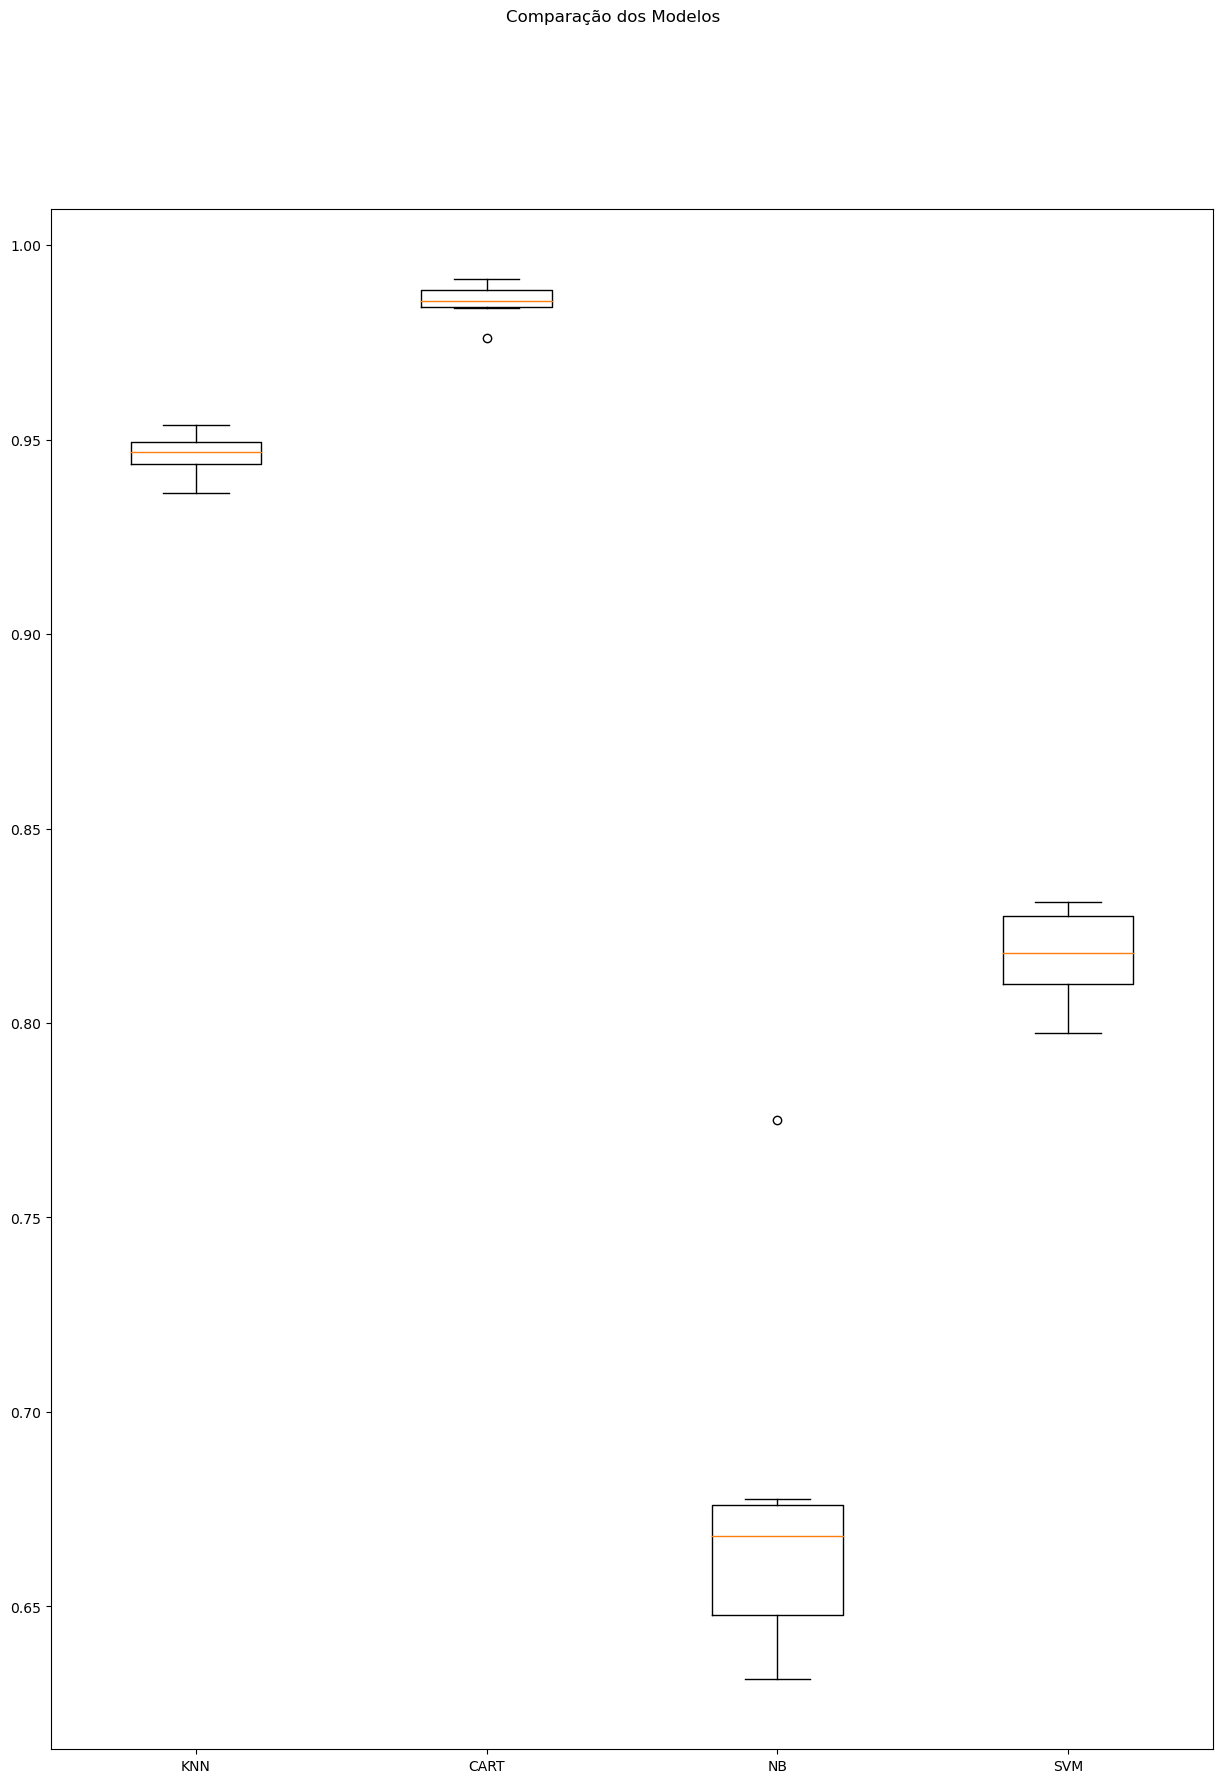

In [4]:
np.random.seed(4)

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mensagem = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(mensagem)

# Hiperparâmetros
# Comparação dos modelos
fig = plt.figure(figsize=(15,20))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN-orig: Acurácia - 0.946| Desvio Padrão - 0.005 | F1 Score - 0.946
CART-orig: Acurácia - 0.986| Desvio Padrão - 0.004 | F1 Score - 0.986
NB-orig: Acurácia - 0.671| Desvio Padrão - 0.038 | F1 Score - 0.643
SVM-orig: Acurácia - 0.818| Desvio Padrão - 0.011 | F1 Score - 0.812
KNN-padr: Acurácia - 0.931| Desvio Padrão - 0.011 | F1 Score - 0.931
CART-padr: Acurácia - 0.986| Desvio Padrão - 0.005 | F1 Score - 0.986
NB-padr: Acurácia - 0.787| Desvio Padrão - 0.006 | F1 Score - 0.777
SVM-padr: Acurácia - 0.903| Desvio Padrão - 0.009 | F1 Score - 0.902
KNN-norm: Acurácia - 0.930| Desvio Padrão - 0.007 | F1 Score - 0.930
CART-norm: Acurácia - 0.986| Desvio Padrão - 0.003 | F1 Score - 0.985
NB-norm: Acurácia - 0.787| Desvio Padrão - 0.006 | F1 Score - 0.777
SVM-norm: Acurácia - 0.854| Desvio Padrão - 0.009 | F1 Score - 0.854


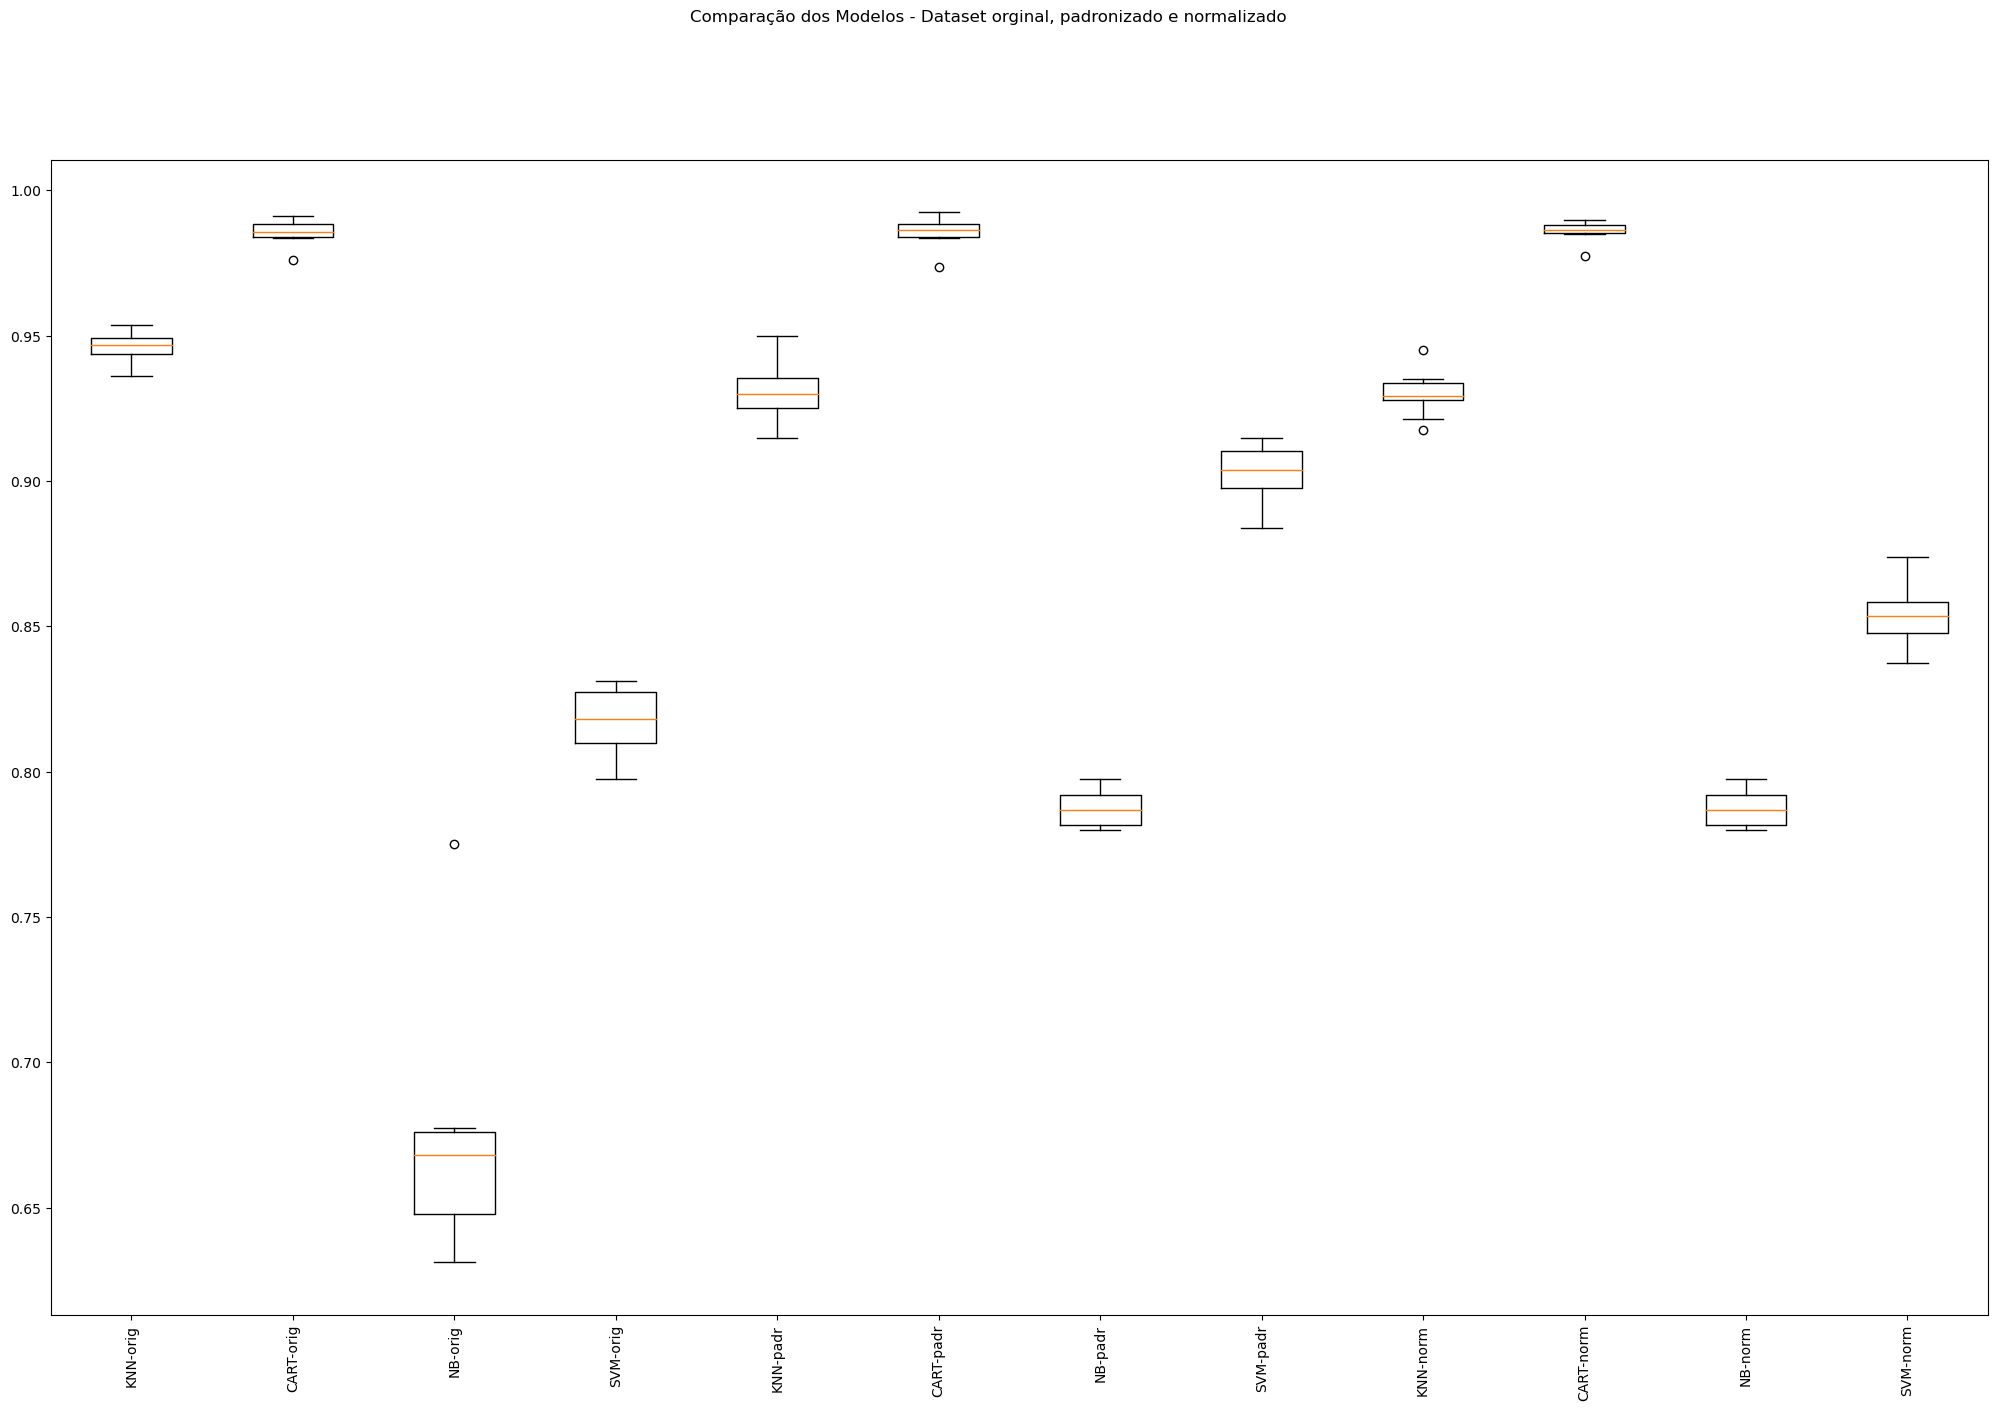

In [5]:
np.random.seed(4)

pipelines = []
results = []
names = []




# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)
    f1 = f1_score(y_train, y_pred, average='weighted')
    results.append(cv_results)
    names.append(name)
    msg = "%s: Acurácia - %.3f| Desvio Padrão - %.3f | F1 Score - %.3f" % (name, cv_results.mean(), cv_results.std(), f1) 
    print(msg)

# Comparação dos modelos
fig = plt.figure(figsize=(25,15))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

<h1>Escolha do Modelo</h1>
<p>O modelo escolhido foi <strong>Árvore de Decisão - Original</strong></p>
<ul>
    <li>O modelo apresentou uma das melhores acurácias entre os modelos testados antes do tratamento com uma diferença de cerca de 4% para o modelo KNN</li>
    <br>
    <li>Nos modelos com os dados tratados, a acurácia da Árvore de Decisão é mantida como a maior entre os outros modelos</li>
    <br>
    <li> Os únicos modelos que mostraram métricas parecidas com as  da Árvore de Decisão Original foram os modelos normalizado e padronizado de Árvore de Decisão. No entanto as diferenças entre as métricas não ultrapassaram 0,001 </li>
</ul>


In [6]:
#Definindo a profundidade máxima para evitar overfitting e problemas de desempenho
dt =  DecisionTreeClassifier(max_depth = 5, random_state=4)

In [7]:
model = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.968
Precisão: 0.984472049689441
Recall: 0.951
F1: 0.9674465920651069


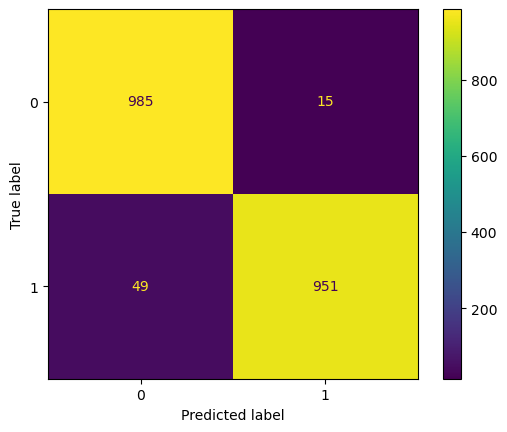

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

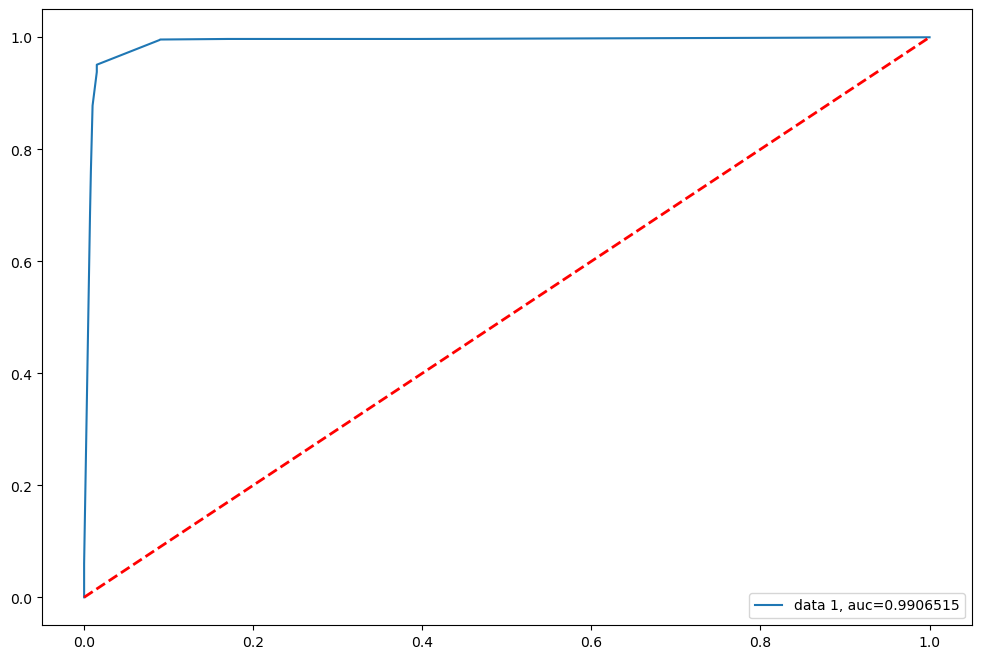

In [9]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Curva ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [10]:
# Preparação do modelo CART original com TODO o dataset
model.fit(X, y)

# Estimativa da acurácia no conjunto de teste
predictions_original = model.predict(X_test)

In [11]:
# Novos dados para testar o modelo
data = {'step':  [1, 3, 2],
        'type_CASH_IN': [1, 0, 0],
        'type_CASH_OUT': [0, 1, 0],
        'type_DEBIT': [0, 0, 0],
        'type_PAYMENT': [0, 0, 1],
        'type_TRANSFER': [0, 0, 0],
        'amount': [1150, 3360, 5250],
        'oldbalanceOrg': [5000, 3782, 5528],
        'newbalanceOrg': [3850, 422, 350],
        'oldbalanceDest': [1500, 1500, 3920],
        'newbalanceDest': [2650, 5282, 9448],
        }

atributos = ['step', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

In [12]:
# Predição de saída dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

[1. 1. 1.]


<h1> Exportação do Modelo </h1>

In [13]:
import pickle
with open('modelo.pkl', 'wb') as file:
    pickle.dump(model, file)

In [14]:
import joblib
joblib.dump(model, 'modelo.joblib')

['modelo.joblib']

<h1> Conclusões </h1>

<ul>
    <li> O modelo de Árvore de Classificação foi escolhido por ter uma acurácia muito alta (maior que 0.90) e maior que qualquer outro modelo testado</li>
    <br>
    <li> O que podemos observar tanto pela Curva Roc quanto pela Confusion Matrix é que o modelo possúi boas sensibilidade e especificidade</li>
    <br>
    <li> A Curva Roc mostrou uma boa AUC com o resultado maior que 0.99</li>
    <br>
    <li> A Confusion Matrix mostra que o erro principal do modelo é não reconhecer uma transação fraudulenta com 42 erros em uma pool de 1000 transações fraudulentas</li>
</ul>